In [25]:
import os
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exps = os.listdir('assignments/03/output')
list_of_scores = []
for d in exps:
    if d.startswith('en-fr'):
        scores = {}
        scores['experiment'] = d
        with open(os.path.join('assignments/03/output', d, 'bleu.txt')) as f:
            data = json.load(f)
            scores['bleu'] = data['score']
            vbs = data['verbose_score'].split(' (')[0].split('/')
            scores['1gram'] = vbs[0]
            scores['2gram'] = vbs[1]
            scores['3gram'] = vbs[2]
            scores['4gram'] = vbs[3]
        list_of_scores.append(scores)

FileNotFoundError: [Errno 2] No such file or directory: 'assignments/03/output/en-fr_lex/bleu.txt'

In [26]:
data

{'name': 'BLEU',
 'score': 13.9,
 'signature': 'nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.4.3',
 'verbose_score': '41.1/18.8/9.8/5.0 (BP = 1.000 ratio = 1.334 hyp_len = 5190 ref_len = 3892)',
 'nrefs': '1',
 'case': 'mixed',
 'eff': 'no',
 'tok': '13a',
 'smooth': 'exp',
 'version': '2.4.3'}

In [27]:
df_scores = pd.DataFrame(list_of_scores)
df_scores['batch_size'] = df_scores['experiment'].apply(lambda x: x.split('_')[1][2:])
df_scores['lr'] = df_scores['experiment'].apply(lambda x: f"0.{x.split('_')[2][2:]}")
df_scores['batch_size'] = df_scores['batch_size'].astype(int)
df_scores['lr'] = df_scores['lr'].astype(float)
df_scores = df_scores.sort_values(by=['batch_size','lr']).reset_index(drop=True)
df_scores.to_csv('hyperparam.csv', index=False)
df_scores

,experiment,bleu,1gram,2gram,3gram,4gram,batch_size,lr
0,en-fr_bs1_lr0003,16.8,44.0,22.1,12.2,6.7,1,0.0003
1,en-fr_bs1_lr0006,13.9,41.1,18.8,9.8,5.0,1,0.0006
2,en-fr_bs1_lr0012,9.7,32.6,14.0,6.7,2.8,1,0.0012
3,en-fr_bs1_lr0024,2.0,12.8,3.5,1.1,0.3,1,0.0024
4,en-fr_bs1_lr0048,0.5,9.2,1.4,0.2,0.0,1,0.0048
5,en-fr_bs4_lr0003,18.2,48.2,23.8,13.1,7.3,4,0.0003
6,en-fr_bs4_lr0006,14.2,42.3,19.7,10.2,4.9,4,0.0006
7,en-fr_bs4_lr0012,14.2,40.7,19.3,10.2,5.1,4,0.0012
8,en-fr_bs4_lr0024,9.1,31.9,13.1,6.1,2.7,4,0.0024
9,en-fr_bs4_lr0048,6.5,27.6,10.1,4.4,1.5,4,0.0048


In [28]:
def get_data_from_loss(exp):
    bs = exp.split('_')[1][2:]
    lr = f"{exp.split('_')[2][2:]}"
    with open(os.path.join('logs', f"en-fr_bs{bs}_lr{lr}.log")) as f:
        data_line = [l for l in f.readlines() if 'valid_loss' in l][-1]
        valid_loss = float(re.search(r'valid_loss (\d+\.\d+)', data_line).group(1))
        perplexity = float(re.search(r'valid_perplexity (\d+)', data_line).group(1))
        return valid_loss, perplexity



In [36]:
for exp in exps:
    valis_loss, perplexity = get_data_from_loss(exp)
    df_scores.loc[df_scores['experiment'] == exp, 'valid_loss'] = valis_loss
    df_scores.loc[df_scores['experiment'] == exp, 'perplexity'] = perplexity

IndexError: list index out of range

In [30]:
df_scores.sort_values(by='bleu', ascending=False).reset_index(drop=True)

,experiment,bleu,1gram,2gram,3gram,4gram,batch_size,lr,valid_loss,perplexity
0,en-fr_bs256_lr0024,18.8,51.9,25.0,13.6,7.1,256,0.0024,2.28,9.0
1,en-fr_bs4_lr0003,18.2,48.2,23.8,13.1,7.3,4,0.0003,2.34,10.0
2,en-fr_bs64_lr0012,17.6,49.6,23.8,12.6,6.5,64,0.0012,2.39,10.0
3,en-fr_bs1_lr0003,16.8,44.0,22.1,12.2,6.7,1,0.0003,2.37,10.0
4,en-fr_bs64_lr0024,15.7,46.1,21.6,11.1,5.5,64,0.0024,2.43,11.0
5,en-fr_bs256_lr0006,15.6,49.6,21.2,10.8,5.3,256,0.0006,2.40,11.0
6,en-fr_bs256_lr0012,14.8,48.7,20.5,10.0,4.8,256,0.0012,2.43,11.0
7,en-fr_bs64_lr0003,14.7,46.3,20.1,10.1,4.9,64,0.0003,2.41,11.0
8,en-fr_bs16_lr0006,14.6,44.9,20.2,10.2,5.0,16,0.0006,2.46,11.0
9,en-fr_bs16_lr0012,14.5,42.3,19.8,10.3,5.2,16,0.0012,2.53,12.0


In [31]:
# colors = plt.cm.Greens(np.linspace(0.19, 0.99, 5))
# plt.figure(figsize=(10, 4))

# plt.subplot(1,2,1)

# for i, batch_size in enumerate([1, 4, 16, 64, 256]):
#     batch_data = df_scores[df_scores['batch_size'] == batch_size]
#     plt.plot([str(lr) for lr in batch_data['lr']], batch_data['valid_loss'], 
#              label=f'Batch Size {batch_size}', color=colors[i])
    
#     min_idx = batch_data['valid_loss'].idxmin()
#     min_lr = str(batch_data.loc[min_idx, 'lr'])
#     min_loss = batch_data.loc[min_idx, 'valid_loss']
    
#     plt.plot(min_lr, min_loss, 'o', markersize=3, color=colors[i],)
# plt.grid(True)

# plt.xlabel('Learning Rate')
# plt.ylabel('Validation Loss')
# plt.legend()

# for i, batch_size in enumerate([1, 4, 16, 64, 256]):
#     batch_data = df_scores[df_scores['batch_size'] == batch_size]
#     plt.subplot(1,2,2)
#     plt.plot([str(lr) for lr in batch_data['lr']], batch_data['bleu'], 
#              label=f'Batch Size {batch_size}', color=colors[i])
    
#     max_idx = batch_data['bleu'].idxmax()
#     max_lr = str(batch_data.loc[max_idx, 'lr'])
#     max_bleu = batch_data.loc[max_idx, 'bleu']
    
#     plt.plot(max_lr, max_bleu, 'o', markersize=3, color=colors[i])
# plt.grid(True)
# plt.xlabel('Learning Rate')
# plt.ylabel('BLEU Score')
# plt.legend()

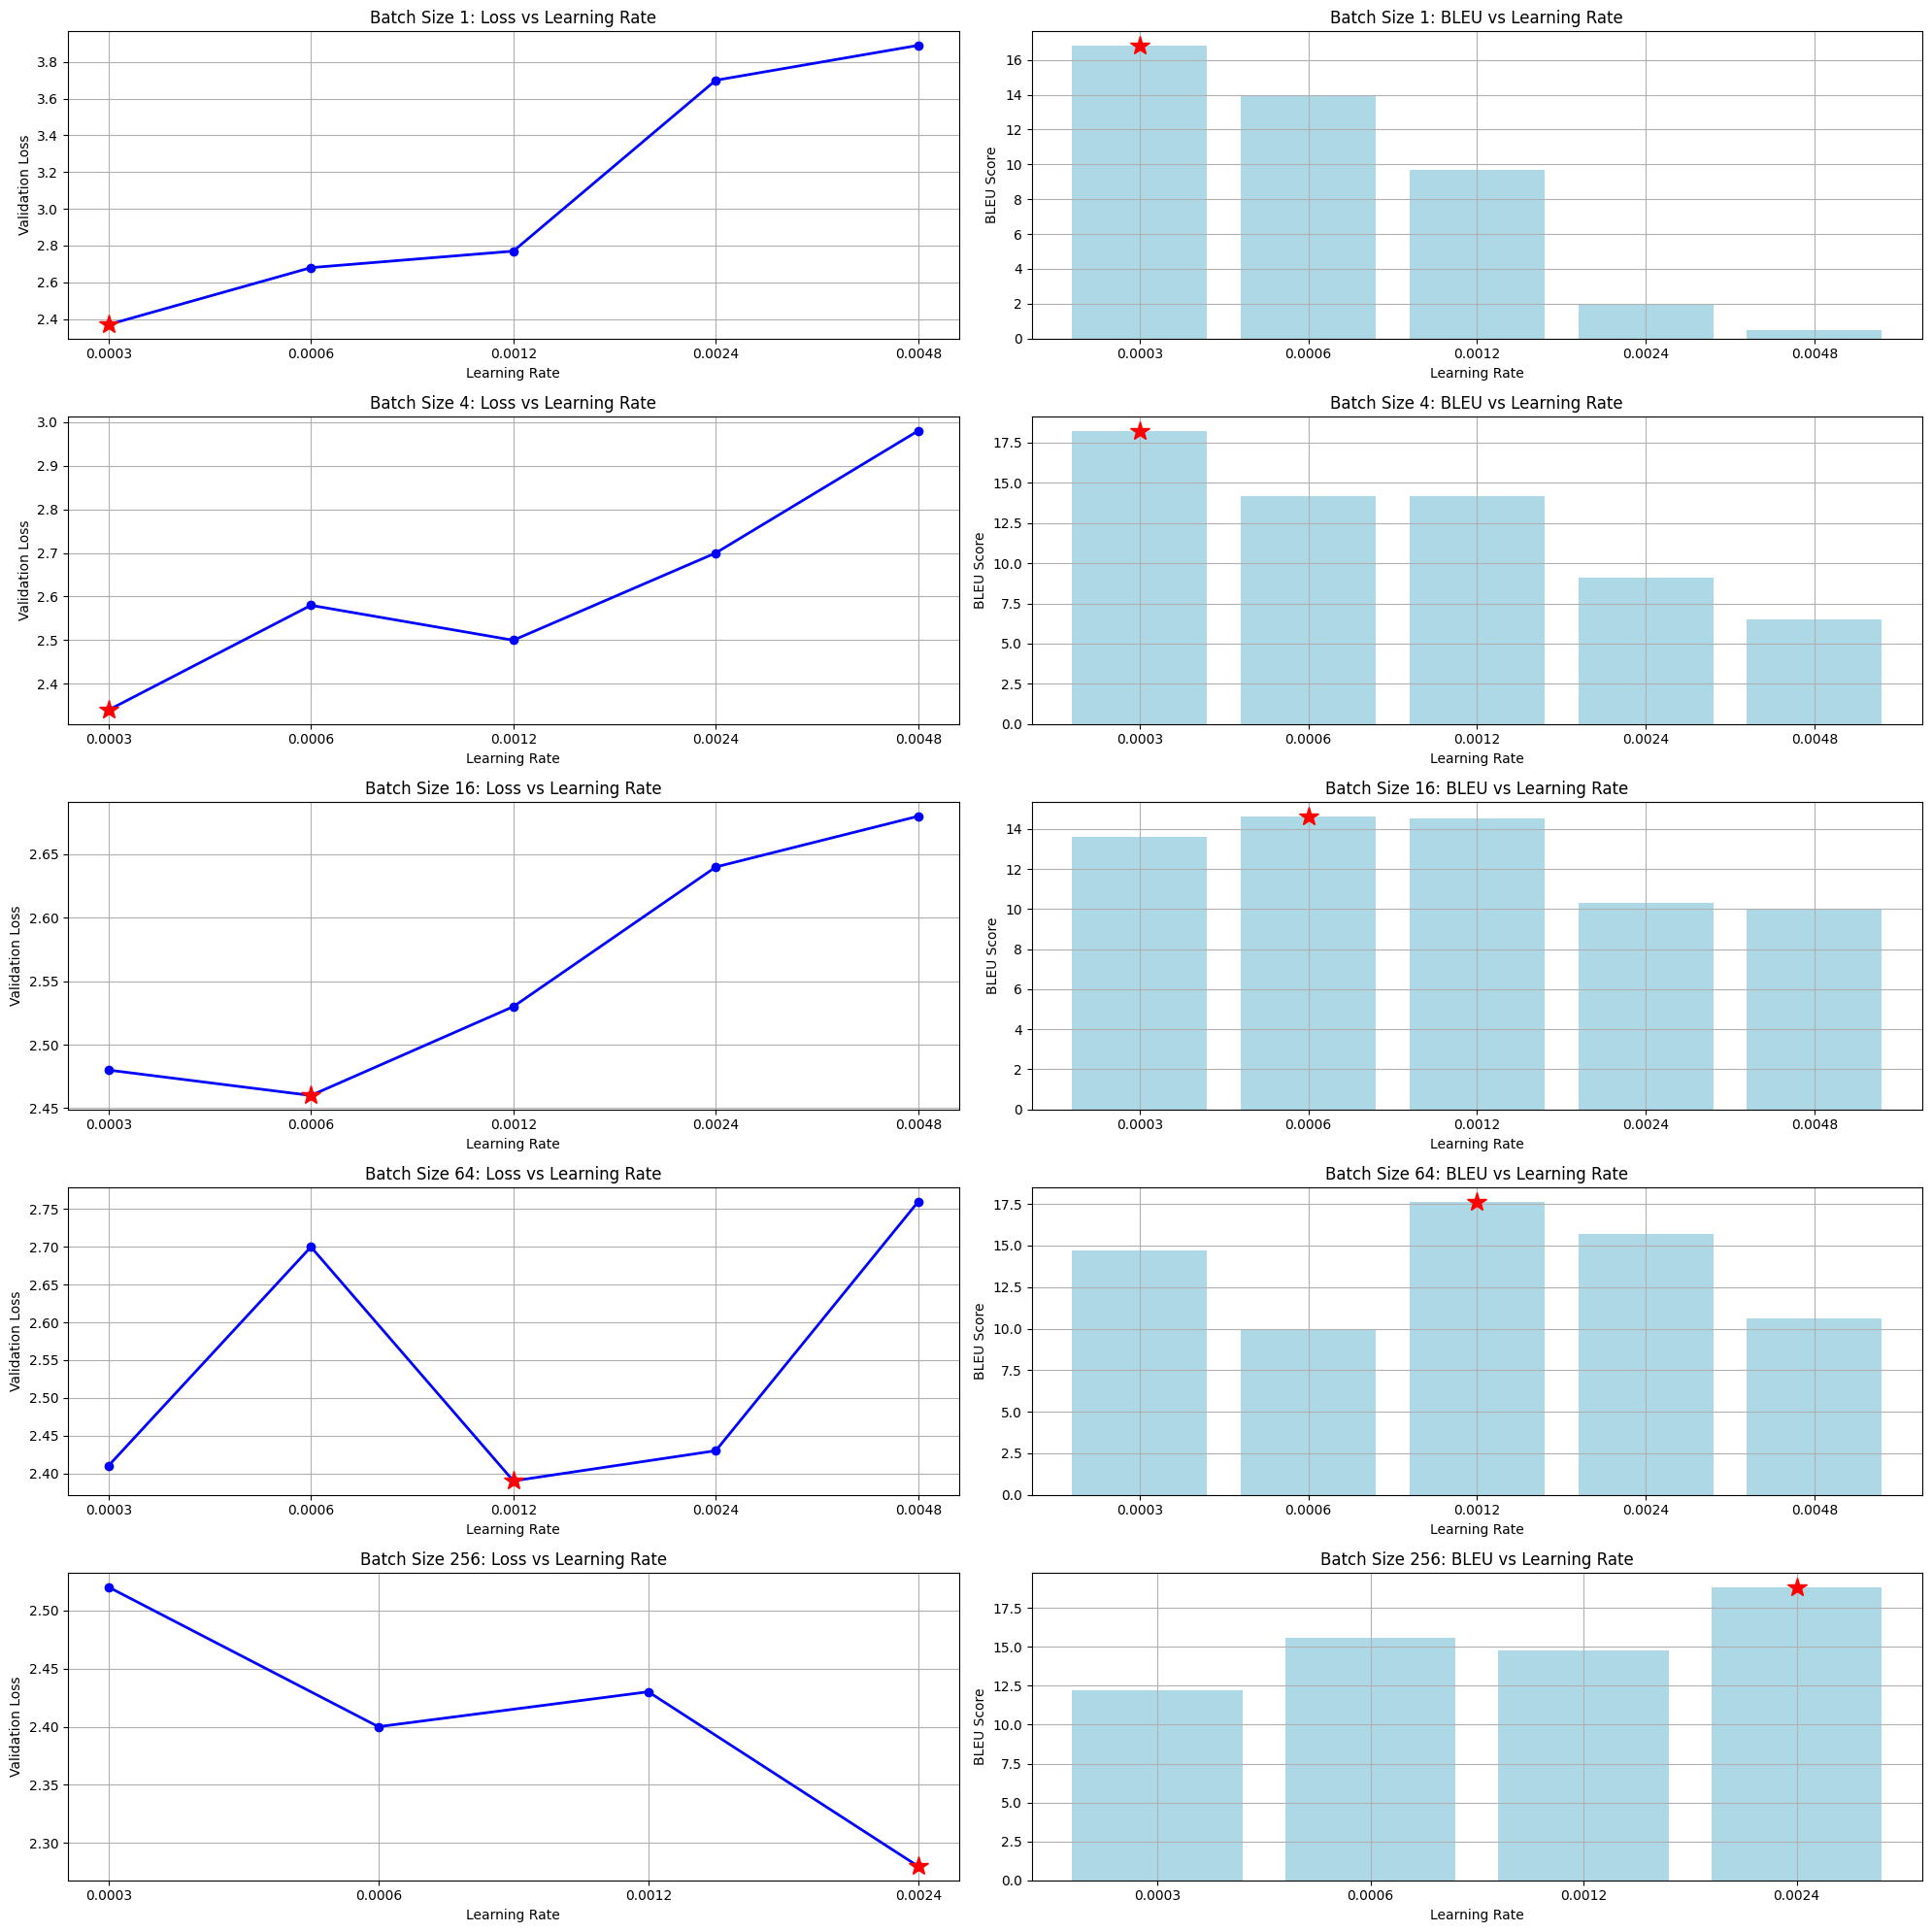

In [32]:
batch_sizes = [1, 4, 16, 64, 256]
fig = plt.figure(figsize=(20, 4*len(batch_sizes)))

for i, batch_size in enumerate(batch_sizes):
    batch_data = df_scores[df_scores['batch_size'] == batch_size]
    
    # Create two subplots side by side for each batch size
    ax1 = plt.subplot(len(batch_sizes), 2, 2*i + 1)
    ax2 = plt.subplot(len(batch_sizes), 2, 2*i + 2)
    
    # Plot 1: Loss vs Learning Rate (line plot)
    ax1.plot([str(lr) for lr in batch_data['lr']], batch_data['valid_loss'],
             marker='o', color='blue', linewidth=2)
    min_idx = batch_data['valid_loss'].idxmin()
    min_lr = str(batch_data.loc[min_idx, 'lr'])
    min_loss = batch_data.loc[min_idx, 'valid_loss']
    ax1.plot(min_lr, min_loss, 'r*', markersize=15)
    ax1.grid(True)
    ax1.set_title(f'Batch Size {batch_size}: Loss vs Learning Rate')
    ax1.set_xlabel('Learning Rate')
    ax1.set_ylabel('Validation Loss')
    
    # Plot 2: BLEU vs Learning Rate (bar plot)
    ax2.bar([str(lr) for lr in batch_data['lr']], batch_data['bleu'],
            color='lightblue')
    max_idx = batch_data['bleu'].idxmax()
    max_lr = str(batch_data.loc[max_idx, 'lr'])
    max_bleu = batch_data.loc[max_idx, 'bleu']
    ax2.plot(max_lr, max_bleu, 'r*', markersize=15)
    ax2.grid(True)
    ax2.set_title(f'Batch Size {batch_size}: BLEU vs Learning Rate')
    ax2.set_xlabel('Learning Rate')
    ax2.set_ylabel('BLEU Score')

plt.tight_layout()

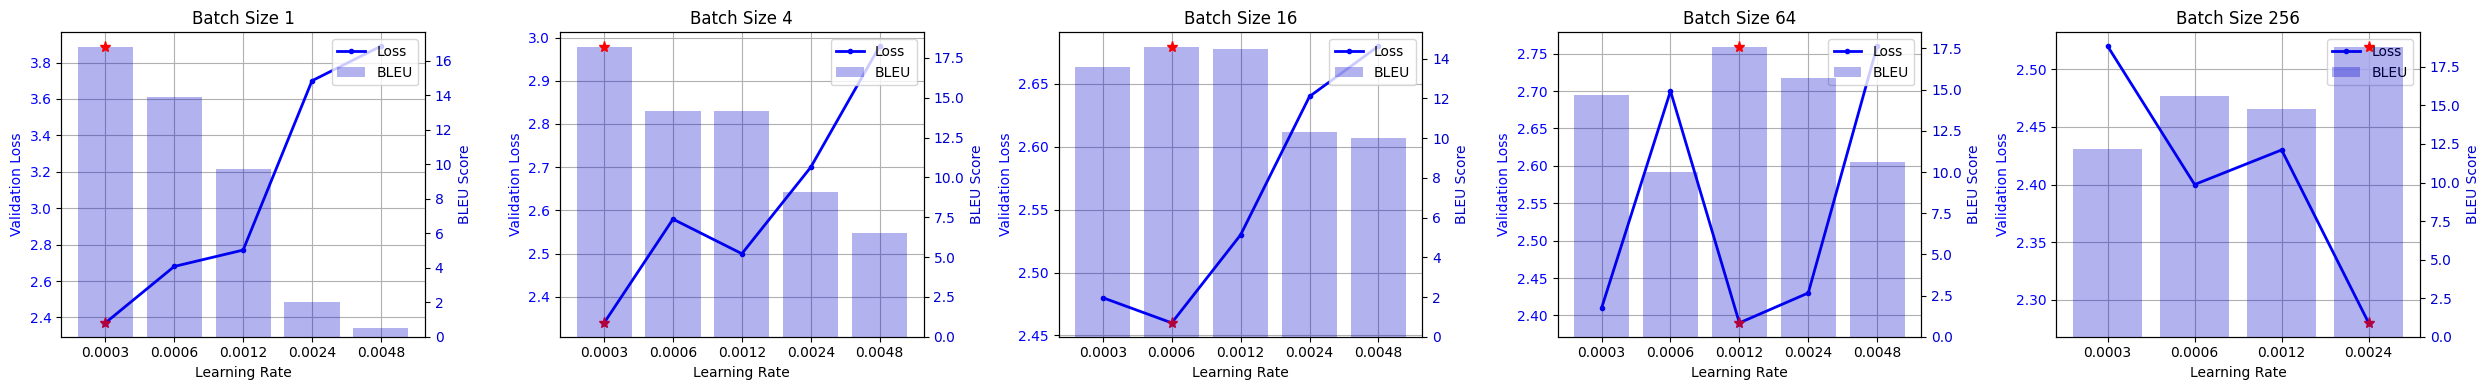

In [33]:
batch_sizes = [1, 4, 16, 64, 256]
fig = plt.figure(figsize=(25, 4))

for i, batch_size in enumerate(batch_sizes):
    batch_data = df_scores[df_scores['batch_size'] == batch_size]
    ax1 = plt.subplot(1, len(batch_sizes), i+1)
    
    color1 = 'blue'
    ax1.set_xlabel('Learning Rate')
    ax1.set_ylabel('Validation Loss', color=color1)
    line1 = ax1.plot([str(lr) for lr in batch_data['lr']], batch_data['valid_loss'],
                     marker='o', color=color1, linewidth=2, label='Loss', markersize=3)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    min_idx = batch_data['valid_loss'].idxmin()
    min_lr = str(batch_data.loc[min_idx, 'lr'])
    min_loss = batch_data.loc[min_idx, 'valid_loss']
    ax1.plot(min_lr, min_loss, 'r*', markersize=8)
    
    ax2 = ax1.twinx()
    color2 = 'mediumblue'
    ax2.set_ylabel('BLEU Score', color=color2)
    bars = ax2.bar([str(lr) for lr in batch_data['lr']], batch_data['bleu'],
                   alpha=0.3, color=color2, label='BLEU')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    max_idx = batch_data['bleu'].idxmax()
    max_lr = str(batch_data.loc[max_idx, 'lr'])
    max_bleu = batch_data.loc[max_idx, 'bleu']
    ax2.plot(max_lr, max_bleu, 'r*', markersize=8)
    
    plt.title(f'Batch Size {batch_size}')
    ax1.grid(True)
    
    lines = line1 + [bars]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    
    plt.xticks(rotation=45)

plt.tight_layout()

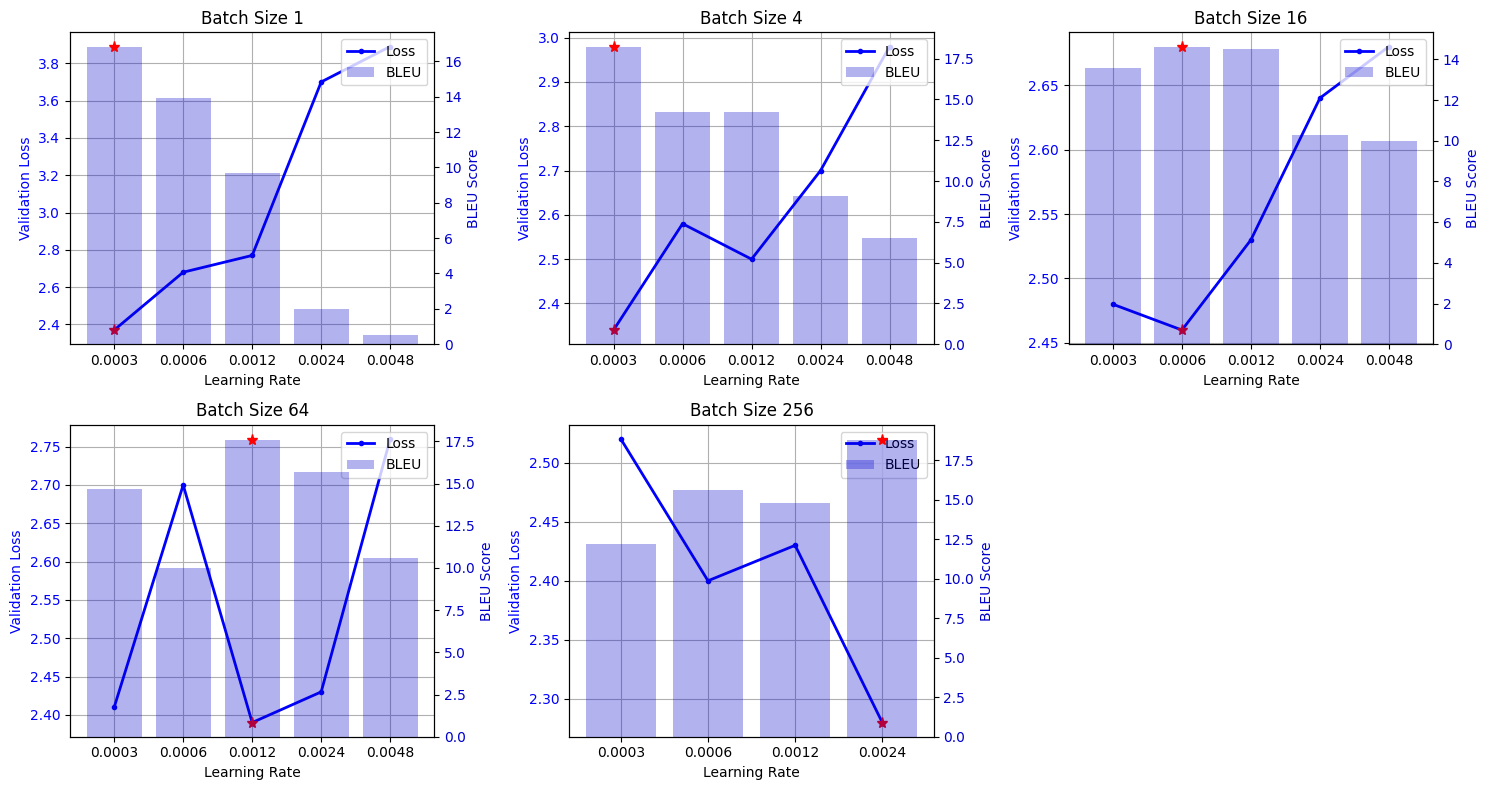

In [34]:
batch_sizes = [1, 4, 16, 64, 256]
fig = plt.figure(figsize=(15, 8))  # Adjusted figure size for 2 rows

# Calculate number of columns needed in each row
n_cols = 3
n_rows = 2

for i, batch_size in enumerate(batch_sizes):
    batch_data = df_scores[df_scores['batch_size'] == batch_size]
    
    # Calculate row and column position
    row = i // n_cols
    col = i % n_cols
    plot_position = row * n_cols + col + 1
    
    ax1 = plt.subplot(n_rows, n_cols, plot_position)
    
    color1 = 'blue'
    ax1.set_xlabel('Learning Rate')
    ax1.set_ylabel('Validation Loss', color=color1)
    line1 = ax1.plot([str(lr) for lr in batch_data['lr']], batch_data['valid_loss'],
                     marker='o', color=color1, linewidth=2, label='Loss', markersize=3)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    min_idx = batch_data['valid_loss'].idxmin()
    min_lr = str(batch_data.loc[min_idx, 'lr'])
    min_loss = batch_data.loc[min_idx, 'valid_loss']
    ax1.plot(min_lr, min_loss, 'r*', markersize=8)
    
    ax2 = ax1.twinx()
    color2 = 'mediumblue'
    ax2.set_ylabel('BLEU Score', color=color2)
    bars = ax2.bar([str(lr) for lr in batch_data['lr']], batch_data['bleu'],
                   alpha=0.3, color=color2, label='BLEU')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    max_idx = batch_data['bleu'].idxmax()
    max_lr = str(batch_data.loc[max_idx, 'lr'])
    max_bleu = batch_data.loc[max_idx, 'bleu']
    ax2.plot(max_lr, max_bleu, 'r*', markersize=8)
    
    plt.title(f'Batch Size {batch_size}')
    ax1.grid(True)
    
    lines = line1 + [bars]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    
    plt.xticks(rotation=45)

plt.tight_layout()

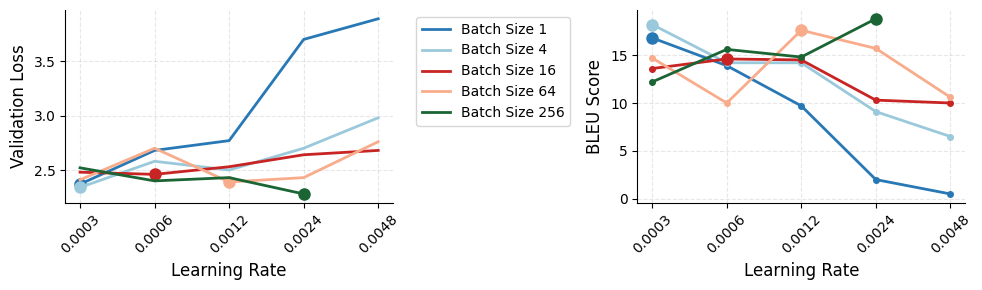

In [35]:
custom_colors = ['#2878B5', '#9AC9DB', '#C82423', '#F8AC8C', '#1B6535']
colors = [plt.cm.colors.to_rgba(c) for c in custom_colors]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

plt.rcParams.update({'font.size': 10})

for i, batch_size in enumerate([1, 4, 16, 64, 256]):
    batch_data = df_scores[df_scores['batch_size'] == batch_size]
    ax1.plot([str(lr) for lr in batch_data['lr']], batch_data['valid_loss'],
            label=f'Batch Size {batch_size}', 
            color=colors[i],
            linewidth=2,
            markersize=8)
    
    min_idx = batch_data['valid_loss'].idxmin()
    min_lr = str(batch_data.loc[min_idx, 'lr'])
    min_loss = batch_data.loc[min_idx, 'valid_loss']
    ax1.plot(min_lr, min_loss, 'o', markersize=8, color=colors[i])

ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_xlabel('Learning Rate', fontsize=12)
ax1.set_ylabel('Validation Loss', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, batch_size in enumerate([1, 4, 16, 64, 256]):
    batch_data = df_scores[df_scores['batch_size'] == batch_size]
    ax2.plot([str(lr) for lr in batch_data['lr']], batch_data['bleu'],
            label=f'Batch Size {batch_size}', 
            color=colors[i],
            linewidth=2,
            marker='.',
            markersize=8)
    
    max_idx = batch_data['bleu'].idxmax()
    max_lr = str(batch_data.loc[max_idx, 'lr'])
    max_bleu = batch_data.loc[max_idx, 'bleu']
    ax2.plot(max_lr, max_bleu, 'o', markersize=8, color=colors[i])

ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_xlabel('Learning Rate', fontsize=12)
ax2.set_ylabel('BLEU Score', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', rotation=45)


plt.tight_layout()